# Support Vector Machines 
## Exercise

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

## Complete the Tasks in bold

**TASK: Run the cells below to import the libraries and load the dataset.**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/fellmir/pyMachineLearningMasterclass/main/input_data/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [6]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,Legit,white


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [9]:
df.shape

(6497, 13)

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
type                     object
dtype: object

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [13]:
df.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   2
type                      2
dtype: int64

In [14]:
def count_all_unique_values(df):
    value_counts_dict = {}
    for col in df.columns:
        value_counts_dict[col] = df[col].value_counts()
    return value_counts_dict

In [16]:
count_all_unique_values(df)

{'fixed acidity': 6.8     354
 6.6     327
 6.4     305
 7.0     282
 6.9     279
        ... 
 14.0      1
 14.3      1
 13.8      1
 13.5      1
 3.9       1
 Name: fixed acidity, Length: 106, dtype: int64,
 'volatile acidity': 0.280    286
 0.240    266
 0.260    256
 0.250    238
 0.220    235
         ... 
 1.010      1
 1.090      1
 0.905      1
 0.805      1
 0.355      1
 Name: volatile acidity, Length: 187, dtype: int64,
 'citric acid': 0.30    337
 0.28    301
 0.32    289
 0.49    283
 0.26    257
        ... 
 0.88      1
 1.66      1
 0.99      1
 1.23      1
 0.86      1
 Name: citric acid, Length: 89, dtype: int64,
 'residual sugar': 2.00     235
 1.80     228
 1.60     223
 1.40     219
 1.20     195
         ... 
 5.95       1
 7.45       1
 65.80      1
 14.05      1
 18.40      1
 Name: residual sugar, Length: 316, dtype: int64,
 'chlorides': 0.044    206
 0.036    200
 0.042    187
 0.046    185
 0.050    182
         ... 
 0.387      1
 0.422      1
 0.222      1


In [18]:
count_all_unique_values(df[['quality']])

{'quality': Legit    6251
 Fraud     246
 Name: quality, dtype: int64}

**TASK: What are the unique variables in the target column we are trying to predict (quality)?**

In [19]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

array(['Legit', 'Fraud'], dtype=object)

**TASK: Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

<Axes: xlabel='quality', ylabel='count'>

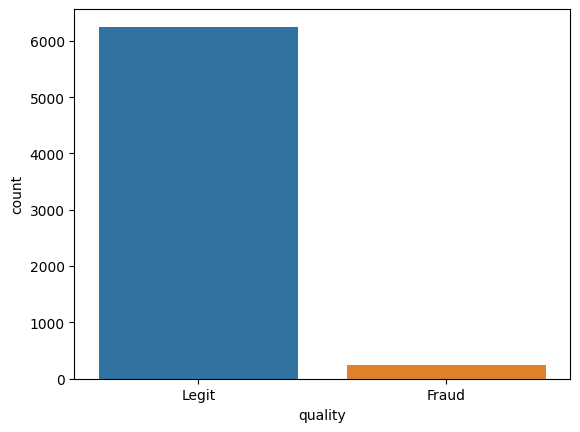

In [21]:
# CODE HERE
sns.countplot(df, x=df['quality'])

<AxesSubplot:xlabel='quality', ylabel='count'>

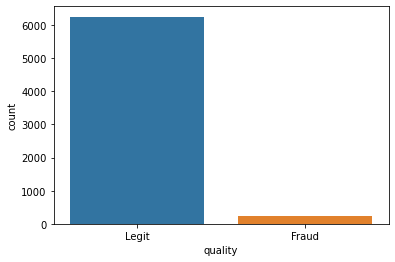

**TASK: Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<Axes: xlabel='type', ylabel='count'>

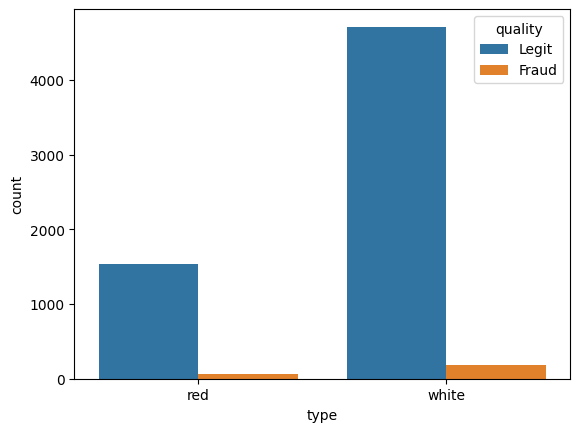

In [23]:
# CODE HERE
sns.countplot(df, x=df['type'], hue=df['quality'])

<AxesSubplot:xlabel='type', ylabel='count'>

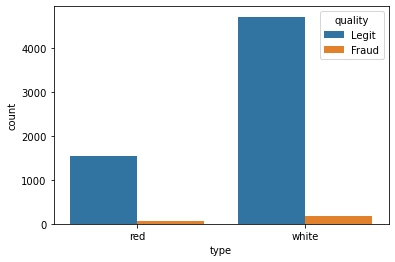

**TASK: What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [28]:
fraud_df = df[df['quality'] == 'Fraud']

fraud_counts = fraud_df['type'].value_counts()

total_counts = df['type'].value_counts()

red_fraud_percentage = (fraud_counts['red'] / total_counts['red']) * 100
print(f"Percentage of 'red' wines which are 'Fraud': {red_fraud_percentage:.2f}%")

Percentage of 'red' wines which are 'Fraud': 3.94%


Percentage of fraud in Red Wines:
3.9399624765478425


In [29]:
white_fraud_percentage = (fraud_counts['white'] / total_counts['white']) * 100
print(f"Percentage of 'white' wines which are 'Fraud': {white_fraud_percentage:.2f}%")

Percentage of 'white' wines which are 'Fraud': 3.74%


Percentage of fraud in White Wines:
3.7362188648427925


**TASK: Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [33]:
# CODE HERE
df['red'] = df['type'].map({'red': 1, 'white': 0})
df['Fraud'] = df['quality'].map({'Fraud': 1, 'Legit': 0})

In [35]:
correlation_matrix = df.corr()

In [36]:
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,Fraud
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.486740,0.021794
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.653036,0.151228
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.187397,-0.061789
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.348821,-0.048756
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.512678,0.034499
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.471644,-0.085204
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.700357,-0.035252
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.390645,0.016351
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.329129,0.020107
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.487218,-0.034046


In [37]:
correlation_matrix['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
red                     0.004598
Fraud                   1.000000
Name: Fraud, dtype: float64

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**TASK: Create a bar plot of the correlation values to Fraudlent wine.**

Text(0, 0.5, 'Features')

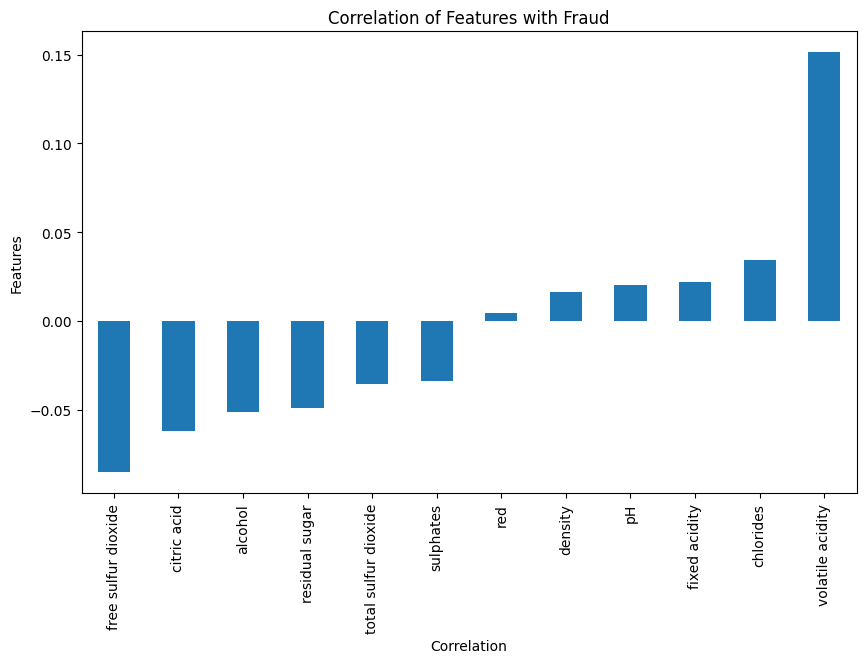

In [40]:
# CODE HERE
fraud_corr = correlation_matrix['Fraud']

fraud_corr = fraud_corr.drop('Fraud')

# sorted_corr = fraud_corr.reindex(fraud_corr.abs().sort_values(ascending=True).index)

sorted_corr = fraud_corr.reindex(fraud_corr.sort_values(ascending=True).index)

plt.figure(figsize=(10,6))
sorted_corr.plot(kind='bar')
plt.title('Correlation of Features with Fraud')
plt.xlabel('Correlation')
plt.ylabel('Features')

<AxesSubplot:>

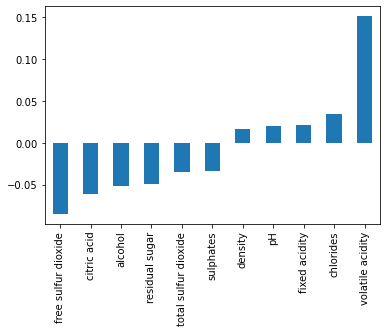

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

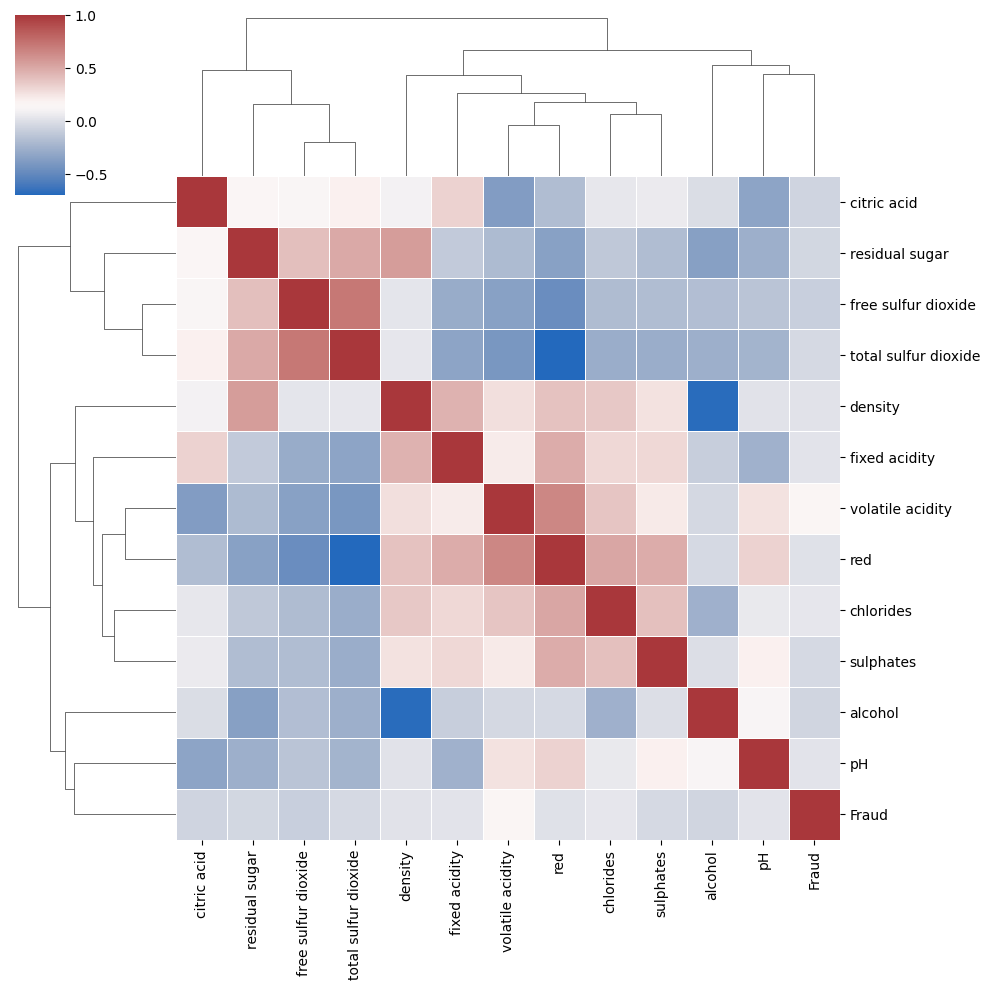

In [41]:
# CODE HERE
corr = df.corr()

sns.clustermap(corr, cmap='vlag', linewidths=.5)

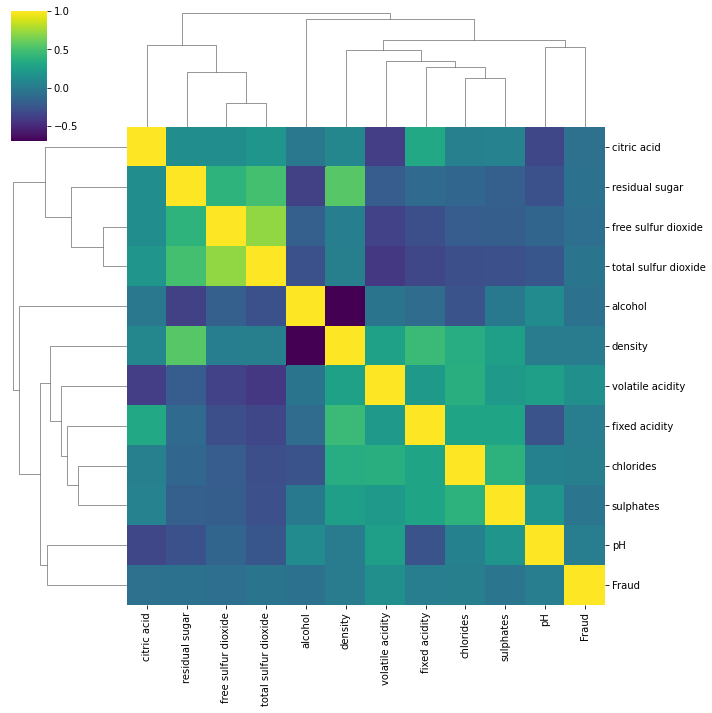

----
## Machine Learning Model

**TASK: Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [42]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
 13  red                   6497 non-null   int64  
 14  Fraud                 6497 non-null   int64  
dtypes: float64(11), int64

**TASK: Separate out the data into X features and y target label ("quality" column)**

In [43]:
X = df.drop(['type', 'Fraud', 'quality'], axis=1)

In [44]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [45]:
y = df['quality']

In [46]:
y.head()

0    Legit
1    Legit
2    Legit
3    Legit
4    Legit
Name: quality, dtype: object

**TASK: Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [48]:
X_train.shape

(5847, 12)

In [50]:
y_test.shape

(650,)

**TASK: Scale the X train and X test data.**

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [52]:
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [55]:
scaled_X_train[0]

array([ 1.07925583,  2.11467205, -1.50654017, -0.80504693,  1.03588842,
       -1.55047527, -1.83291519,  0.92448636,  0.55963847,  0.79094629,
       -0.79108083,  1.75668833])

In [56]:
scaled_X_test[0]

array([-0.31042998,  1.35022785, -0.67668168, -0.7630049 ,  0.51737025,
       -0.87226347, -1.62094393, -0.09930376,  1.11764394,  1.92739138,
        0.5877305 ,  1.75668833])

**TASK: Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

In [57]:
# CODE HERE
from sklearn.svm import SVC

svc_model = SVC(class_weight='balanced')

**TASK: Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [59]:
# CODE HERE
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['poly','rbf','sigmoid'],
    'degree':[2,3,4,5]
}

In [60]:
from sklearn.model_selection import GridSearchCV

svc_grid = GridSearchCV(svc_model,param_grid)

In [61]:
svc_grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10],
                         'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [62]:
svc_grid.best_params_

{'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

{'C': 1, 'gamma': 'auto'}

In [64]:
svc_grid.best_score_

0.9613469032630709

**TASK: Display the confusion matrix and classification report for your model.**

In [63]:
y_pred = svc_grid.predict(scaled_X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [67]:
cm = confusion_matrix(y_test, y_pred)

# convert to DataFrame
cm_df = pd.DataFrame(cm, 
                     index = ['True Negative', 'True Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])

print(cm_df)

               Predicted Negative  Predicted Positive
True Negative                   3                  24
True Positive                   6                 617


In [66]:
confusion_matrix(y_test,y_pred)

array([[  3,  24],
       [  6, 617]], dtype=int64)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.33      0.11      0.17        27
       Legit       0.96      0.99      0.98       623

    accuracy                           0.95       650
   macro avg       0.65      0.55      0.57       650
weighted avg       0.94      0.95      0.94       650



              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



**TASK: Finally, think about how well this model performed, would you suggest using it? Realistically will this work?**

In [ ]:
# ANSWER: View the solutions video for full discussion on this.


$\text{nope}$